In [1]:
import pandas as pd
import os
from sqlalchemy import create_engine
import urllib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette='crest')
import plotly.express as px

server = 'AMAN\\SQLEXPRESS'   
database = 'SpotifyDB'

 
params = urllib.parse.quote_plus('DRIVER={ODBC Driver 17 for SQL Server};SERVER=' + server + ';DATABASE=' + database + ';Trusted_Connection=yes;')
engine = create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)

In [22]:
df_song = pd.read_sql('SELECT * FROM spotify_tracks_cleaned', engine)

In [23]:
df_song

,track_name,artist_name,release_year,duration_min,valence,acousticness,danceability,energy,explicit_flag,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo_bpm,key_name
0,Don'T Stop Believin',Journey,1981,4.18,0.514,0.12700,0.500,0.748,0,0.000000,4,0.4470,-9.072,1,81,0.0363,118.852,E
1,Jessie'S Girl,Rick Springfield,1981,3.24,0.822,0.16400,0.727,0.832,0,0.000000,2,0.1050,-5.851,1,72,0.0500,131.703,D
2,Tom Sawyer,Rush,1981,4.61,0.666,0.00145,0.536,0.901,0,0.018600,9,0.0600,-7.211,1,72,0.0374,87.559,A
3,In The Air Tonight - 2015 Remastered,Phil Collins,1981,5.61,0.298,0.55100,0.446,0.239,0,0.000004,0,0.0697,-13.945,1,77,0.0316,189.507,C
4,Tainted Love,Soft Cell,1981,2.56,0.626,0.55800,0.542,0.450,0,0.000006,7,0.5790,-9.931,0,68,0.0361,144.437,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79246,China,Anuel Aa Daddy Yankee Karol G Ozuna J Balvin,2020,5.03,0.608,0.08460,0.786,0.808,0,0.000289,7,0.0822,-3.702,1,72,0.0881,105.029,G
79247,Halloweenie Iii: Seven Days,Ashnikko,2020,2.51,0.734,0.20600,0.717,0.753,0,0.000000,7,0.1010,-6.020,1,68,0.0605,137.936,G
79248,Aya,Mamamoo,2020,3.52,0.637,0.10100,0.634,0.858,0,0.000009,4,0.2580,-2.226,0,76,0.0809,91.688,E
79249,Darkness,Eminem,2020,5.62,0.195,0.00998,0.671,0.623,1,0.000008,2,0.6430,-7.161,1,70,0.3080,75.055,D


In [24]:
# Total no of artists and tracks in df 

df_song[['artist_name', 'track_name']].nunique()

artist_name    21711
track_name     62673
dtype: int64

In [25]:
df_song.describe()

,release_year,duration_min,valence,acousticness,danceability,energy,explicit_flag,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo_bpm
count,79251.000000,79251.000000,79251.000000,79251.000000,79251.000000,79251.000000,79251.000000,79251.000000,79251.000000,79251.000000,79251.000000,79251.000000,79251.000000,79251.000000,79251.000000
mean,2000.467073,4.005869,0.521673,0.283414,0.574458,0.616059,0.149071,0.098032,5.270268,0.195951,-8.963259,0.687941,47.963458,0.084335,120.744214
std,11.559682,1.576834,0.260208,0.307545,0.178661,0.243276,0.356160,0.247580,3.553492,0.170162,5.031064,0.463337,13.686138,0.096937,30.375879
min,1981.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,1990.000000,3.210000,0.312000,0.021700,0.458000,0.453500,0.000000,0.000000,2.000000,0.092900,-11.145000,0.000000,39.000000,0.034200,96.881000
50%,2000.000000,3.820000,0.524000,0.152000,0.588000,0.647000,0.000000,0.000023,5.000000,0.127000,-7.744000,1.000000,47.000000,0.045900,118.921000
75%,2010.000000,4.550000,0.736000,0.491000,0.706000,0.815000,0.000000,0.006460,8.000000,0.251000,-5.528000,1.000000,57.000000,0.083900,140.013000
max,2020.000000,90.060000,1.000000,0.996000,0.988000,1.000000,1.000000,1.000000,11.000000,1.000000,1.483000,1.000000,100.000000,0.960000,224.437000


### Trends over time

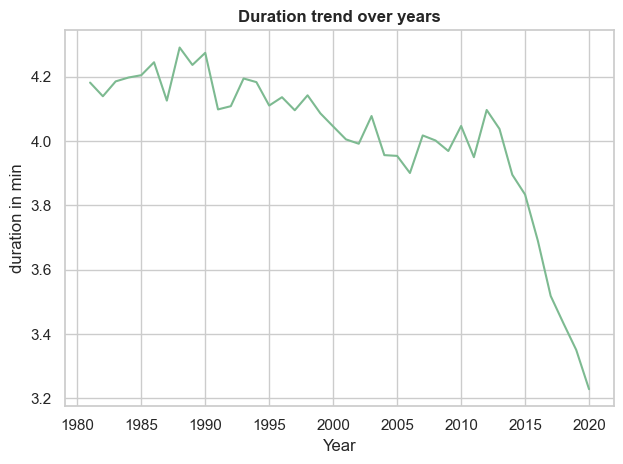

In [44]:
# Average duration over time(normal average)

df_average_duration = pd.read_sql("SELECT release_year,AVG(duration_min) [Avg Track duration] FROM spotify_tracks_cleaned GROUP BY release_year ORDER BY release_year", engine)

#df_average_duration.plot(kind = 'line', x = 'release_year', y = 'Avg Track duration', xlabel = 'year', ylabel = 'duration in min', legend = False, title = 'Duration trend over years')

 
sns.lineplot( x = 'release_year', y = 'Avg Track duration', data = df_average_duration)
plt.xlabel("Year")
plt.ylabel("duration in min")
plt.title("Duration trend over years", weight = 'bold')
plt.tight_layout()
plt.show()

In [45]:
# Average duration over time(running average)

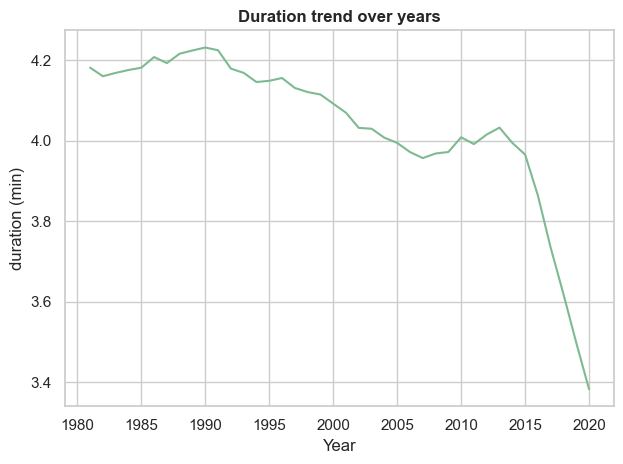

In [46]:
df_rolling_average_duration = pd.read_sql("SELECT release_year, AVG([Avg Duration]) OVER( Order by release_year ROWS BETWEEN 3 PRECEDING AND CURRENT ROW) [Rolling Avg] FROM ( SELECT release_year, AVG(duration_min) [Avg Duration]  FROM spotify_tracks_cleaned GROUP BY release_year)t", engine)
# df_rolling_average_duration.plot(kind = 'line', x = 'release_year', y ='Rolling Avg', xlabel = 'year', ylabel = 'duration in min', legend = False, title = 'Duration trend over years(Rollling)' )

sns.lineplot(x = 'release_year', y ='Rolling Avg', data = df_rolling_average_duration)
plt.xlabel('Year')
plt.ylabel('duration (min)')
plt.title('Duration trend over years', weight = 'bold')
plt.tight_layout()
plt.show()

In [47]:
df_song['track_name'][df_song['release_year']>2012].count()

np.int64(15826)

Here in above graph we can see sharp decline in avergae duration from 2012 so I investigated if there is low sample size but turns out sample size is pretty large so the decline is nattural

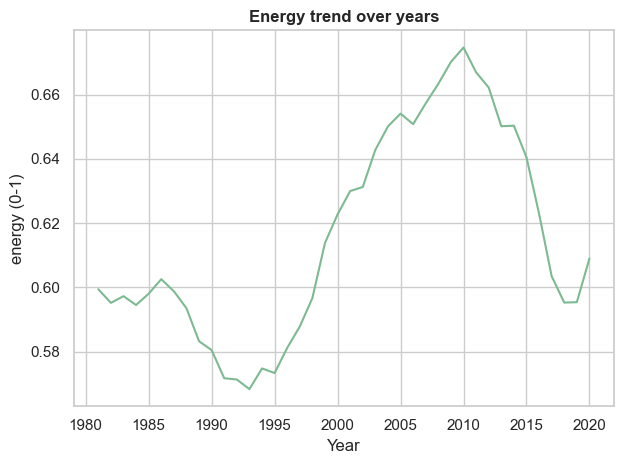

In [49]:
# Average Energy trend over years

df_rolling_average_energy = pd.read_sql("SELECT release_year, AVG([Avg Energy]) OVER(ORDER BY release_year ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) [Rolling Avg] FROM ( SELECT  release_year, AVG(energy) [Avg Energy] FROM spotify_tracks_cleaned GROUP BY release_year)t",engine)
# df_rolling_average_energy.plot(kind = 'line' , x = 'release_year', y = 'Rolling Avg',xlabel = 'year', ylabel = 'energy (0-1)', legend = False, title = 'Energy trend over years')

sns.lineplot(x = 'release_year', y = 'Rolling Avg', data = df_rolling_average_energy)
plt.xlabel('Year')
plt.ylabel('energy (0-1)')
plt.title('Energy trend over years', weight = 'bold')
plt.tight_layout()
plt.show()

Here we can see from 1995 energy in songs started to increase thanks to edm and rise of hip hop songs and from 2010 average energy has been declined because of introduction of lofi, indie music

In [71]:
#df_average_acousticness = pd.read_sql("SELECT release_year, AVG(acousticness) [Avg Acousticness] FROM spotify_tracks_cleaned GROUP BY release_year ORDER BY release_year",engine)

#df_average_acousticness.plot(kind = 'line', x = 'release_year' , y= 'Avg Acousticness')

#sns.lineplot(x = 'release_year', y = 'Avg Acousticness', data = df_average_acousticness)
#plt.xlabel('Year')
#plt.ylabel('Acousticness')
#plt.title('Acousticness trend over years', weight = 'bold')
#plt.tight_layout()
#plt.show()

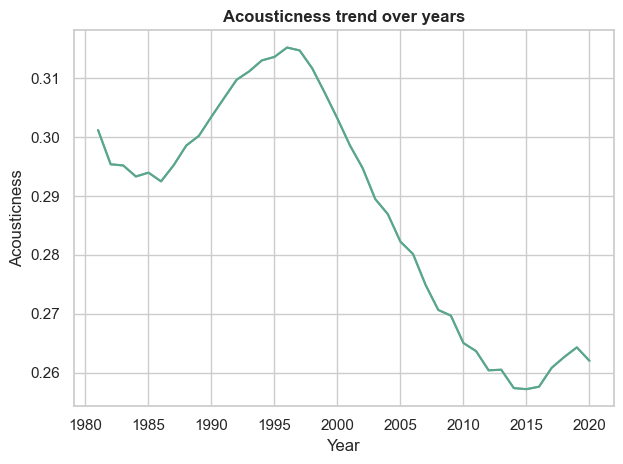

In [74]:
df_rolling_average_acousticnes = pd.read_sql("SELECT  release_year, AVG([Avg Acousticness]) OVER(Order By release_year ROWS BETWEEN 9 Preceding and Current Row) [Rolling Acousticness] FROM ( SELECT release_year, AVG(acousticness) [Avg Acousticness] FROM spotify_tracks_cleaned GROUP BY release_year)t", engine)
df_rolling_average_acousticnes.plot(kind = 'line', x = 'release_year' , y= 'Rolling Acousticness', xlabel = 'Year', ylabel = 'Acousticness(0-1)',legend = False)

sns.lineplot(x = 'release_year', y = 'Rolling Acousticness', data = df_rolling_average_acousticnes, legend = False)
plt.xlabel('Year')
plt.ylabel('Acousticness')
plt.title('Acousticness trend over years', weight = 'bold')
plt.tight_layout()
plt.show()

Observation:

“Between 2010 and 2020, both the energy and acousticness of tracks declined.
This may seem counterintuitive — we’d expect lower-energy songs to be more acoustic.
However, this reflects the rise of digitally produced genres like lo-fi and ambient pop, which sound relaxed but are still electronic in nature.”

📈 The trend over time

1. 1960s–1970s:
High acousticness. Rock, folk, jazz, and soul used real instruments — drums, guitars, pianos, horns — so the acousticness score was typically high.

2. 1980s–2000s:
A decline in acousticness. Synthesizers, drum machines, and digital production became dominant. Genres like synth-pop, hip-hop, and EDM brought acousticness down sharply.

3. 2010s–now:
A slight rebound.

Around the mid-2010s, artists like Ed Sheeran, Adele, and many indie/folk acts brought acoustic sounds back into pop.

However, overall acousticness in mainstream charts (like Spotify Top 50) remains much lower than in the 1980s.

Even acoustic-sounding tracks often mix in digital instruments or effects, so they’re not purely “acoustic.”

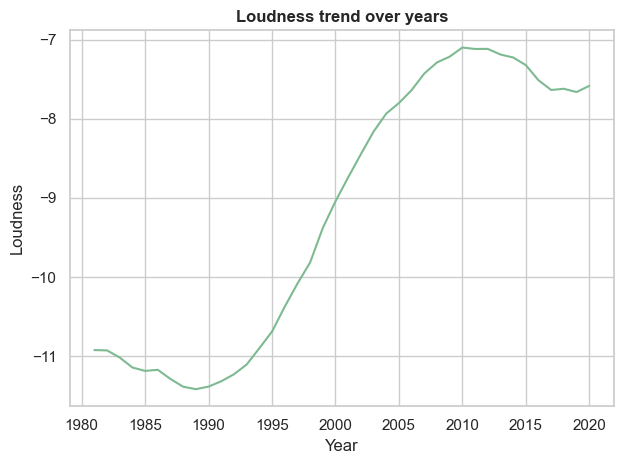

In [75]:
# Average Rolling Loudness in songs

df_rolling_average_loudness = pd.read_sql("SELECT release_year, AVG([Avg Loudness]) OVER(Order by release_year ROWS BETWEEN 5 PRECEDING AND CURRENT ROW) [Rolling Loudness] FROM ( SELECT release_year, AVG(loudness) [Avg Loudness] FROM spotify_tracks_cleaned GROUP BY release_year )t", engine)
#df_rolling_average_loudness.plot(kind = 'line', x= 'release_year', y= 'Rolling Loudness')

sns.lineplot(x= 'release_year', y= 'Rolling Loudness', data = df_rolling_average_loudness, legend = False)
plt.xlabel('Year')
plt.ylabel('Loudness')
plt.title('Loudness trend over years', weight = 'bold')
plt.tight_layout()
plt.show()

We can clearly see over the time average loudness of the songs have increased because louder songs tend to grab attention quickly and in this age of short attention span tracks need to have loudness to catch their goldfish attention and this change in average loudness is called "Loudness War"

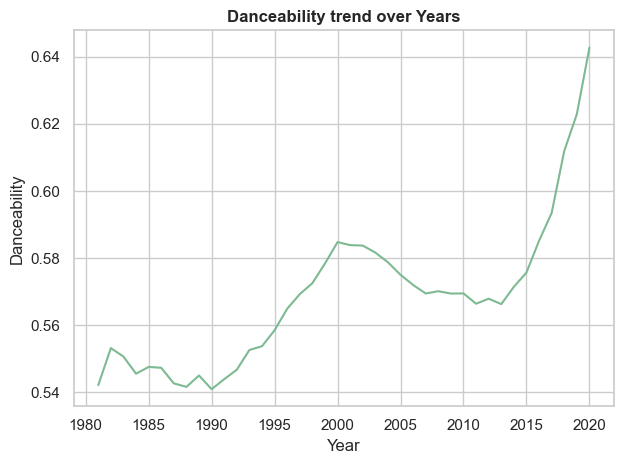

In [77]:
df_rolling_average_danceability = pd.read_sql("SELECT release_year, AVG([Avg danceabillity]) OVER(ORDER BY release_year ROWS BETWEEN 4 PRECEDING AND CURRENT ROW) [Rolling Danceability], AVG([Avg tempo bpm]) OVER(ORDER BY release_year ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) [Rolling Tempo bpm] FROM (	SELECT	release_year,	AVG(danceability) [Avg danceabillity],	AVG(tempo_bpm) [Avg tempo bpm]	FROM spotify_tracks_cleaned	GROUP BY release_year	)t", engine)

# df_rolling_average_danceability.plot(kind = 'line', x= 'release_year', y = 'Rolling Danceability')

sns.lineplot(x= 'release_year', y = 'Rolling Danceability', data = df_rolling_average_danceability, legend = False)
plt.xlabel('Year')
plt.ylabel('Danceability')
plt.title('Danceability trend over Years', weight = 'bold')
plt.tight_layout()
plt.show()

Here we can see over the decades danceability of songs have increased making them more danceable, from early 2000s onwards due to rise of electronic, hip-hop, and pop genres that emphasize rhythm and movement.

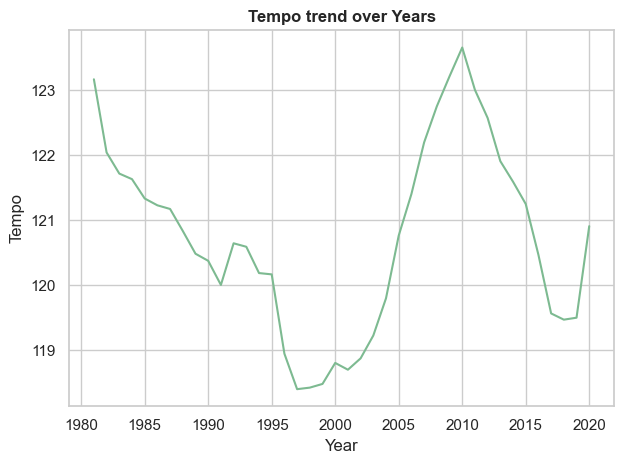

In [78]:
df_rolling_average_tempo = pd.read_sql("SELECT release_year, AVG([Avg danceabillity]) OVER(ORDER BY release_year ROWS BETWEEN 4 PRECEDING AND CURRENT ROW) [Rolling Danceability], AVG([Avg tempo bpm]) OVER(ORDER BY release_year ROWS BETWEEN 3 PRECEDING AND CURRENT ROW) [Rolling Tempo bpm] FROM (	SELECT	release_year,	AVG(danceability) [Avg danceabillity],	AVG(tempo_bpm) [Avg tempo bpm]	FROM spotify_tracks_cleaned	GROUP BY release_year	)t", engine)

#df_rolling_average_tempo.plot(kind = 'line', x= 'release_year', y = 'Rolling Tempo bpm')

sns.lineplot(x= 'release_year', y = 'Rolling Tempo bpm', data = df_rolling_average_tempo, legend = False)
plt.xlabel('Year')
plt.ylabel('Tempo')
plt.title('Tempo trend over Years', weight = 'bold')
plt.tight_layout()
plt.show()

Average tempo has edcreased over decades which was not expected as danceability and loudness has increased over decades but it has shown increase from 2000s due to rise in dance pop era and they were slightly faster and from 2010 tempo has decreased so over decades we can say that tempo is more or less stagnant with slight decrease in comparison to 1990s.

Now for key analysis

In [110]:
key_map = {0:'C', 1:'C#', 2:'D', 3:'D#', 4:'E', 5:'F', 6:'F#', 7:'G', 8:'G#', 9:'A', 10:'A#', 11:'B'}
df_song['key_name'] = df_song['key'].map(key_map)
df_song.to_sql(
    name = 'spotify_tracks_cleaned',
    con = engine,
    index = False,
    if_exists = 'replace'
)

23

What will be my approach: for most used musical key over decade like on an averagge 

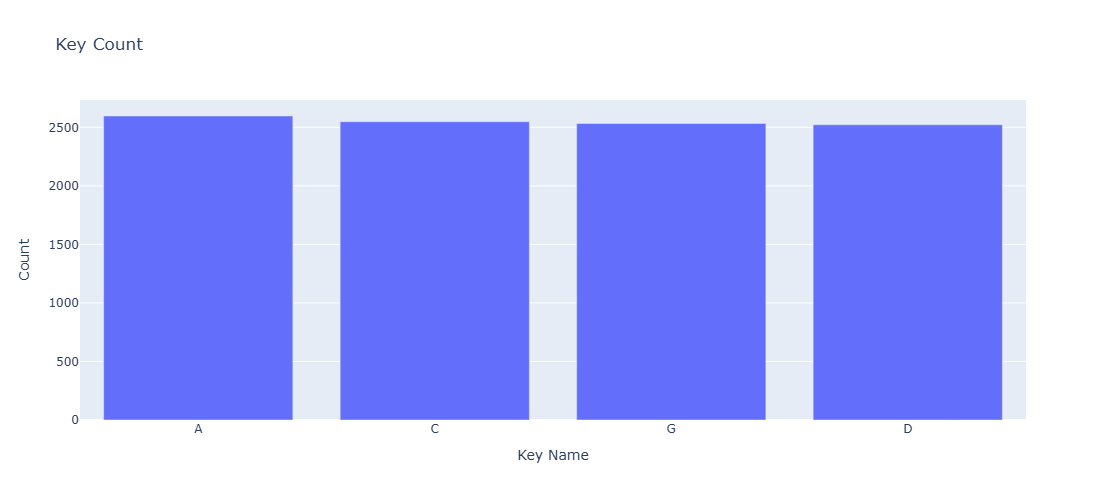

In [108]:
df_keys_1980s = pd.read_sql("SELECT TOP 4 key_name,COUNT(key_name) [Count of keys pre 1990s] FROM spotify_tracks_cleaned WHERE release_year <=1990 GROUP BY key_name ORDER BY COUNT(key_name) DESC ", engine)

# df_keys_1980s.plot(kind = 'bar', x='key_name', y= 'Count of keys pre 1990s', legend = False)



px.bar(x='key_name', y= 'Count of keys pre 1990s', data_frame = df_keys_1980s, width=700, height=500,title = 'Key Count', labels = {'key_name': 'Key Name', 'Count of keys pre 1990s':'Count'})

These A C G D keys were popular back then in 80s because of rising bands and they are also guitar and keyboard friendly, and we can proove that, that era was dominated by pop- rock bands like U2, Bon Jovi, and The Smiths

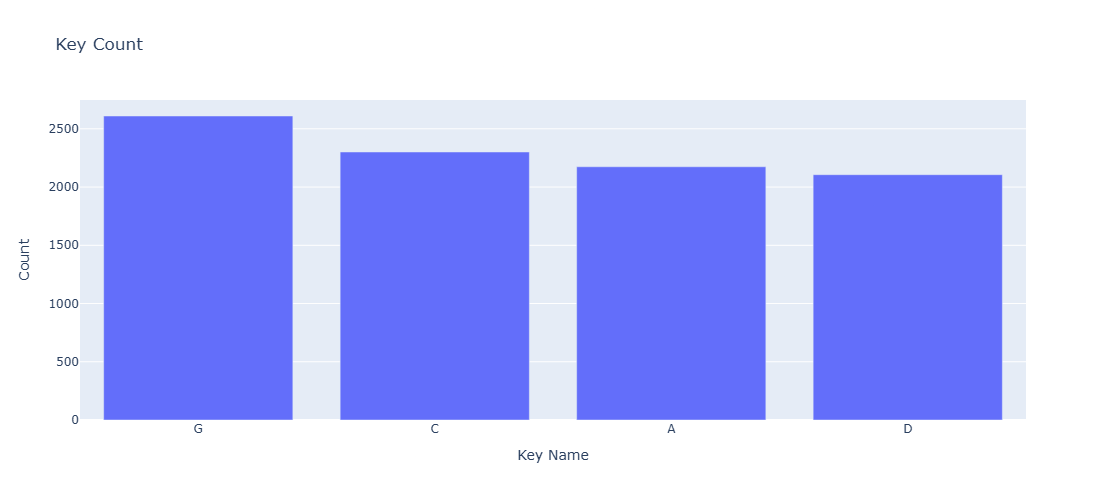

In [115]:
# Keys that dominated in 1990s

df_keys_1990s = pd.read_sql("""SELECT TOP 4 key_name,
COUNT(key_name) [Count of keys in 1990s]
FROM spotify_tracks_cleaned
WHERE release_year <=2000 AND release_year >1990
GROUP BY key_name
ORDER BY COUNT(key_name) DESC 
""", engine)

#df_keys_1990s.plot(kind = 'bar', x='key_name', y= 'Count of keys in 1990s', legend = False)


px.bar(x='key_name', y= 'Count of keys in 1990s', data_frame = df_keys_1990s, width=700, height=500,title = 'Key Count', labels = {'key_name': 'Key Name', 'Count of keys in 1990s':'Count'})

Notice how G key has become most dominant in 1990s as compared to 1980s this shows inclination towards rock grunge music which was perfect for guitar strumming and solo performance which was guitar heavy and reducing keyboard dependancy alnog side with Keys C, A and D which dominated 90s with artists like Nirvana, Green Day, Oasis, R.E.M., Backstreet Boys, Spice Girls.

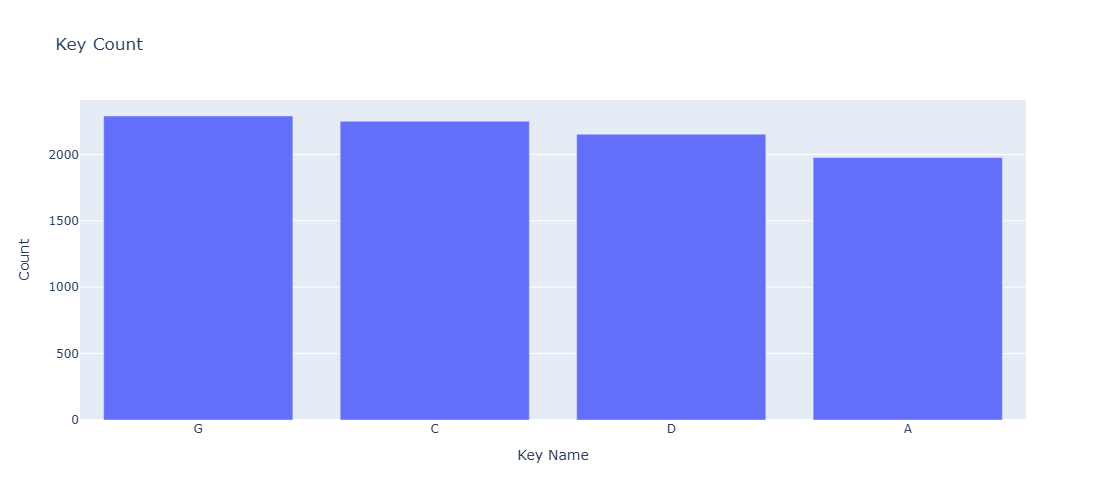

In [117]:
# Keys in 2000s 

df_keys_2000s = pd.read_sql("""SELECT TOP 4 key_name,
COUNT(key_name) [Count of keys in 2000s]
FROM spotify_tracks_cleaned
WHERE release_year <=2010 AND release_year >2000
GROUP BY key_name
ORDER BY COUNT(key_name) DESC 
""", engine)

#df_keys_2000s.plot(kind = 'bar', x='key_name', y= 'Count of keys in 2000s', legend = False)

px.bar(x='key_name', y= 'Count of keys in 2000s', data_frame = df_keys_2000s, width=700, height=500,title = 'Key Count', labels = {'key_name': 'Key Name', 'Count of keys in 2000s':'Count'})

In 2000s it was almost same like 1990s with artists U2, Linkin Park.

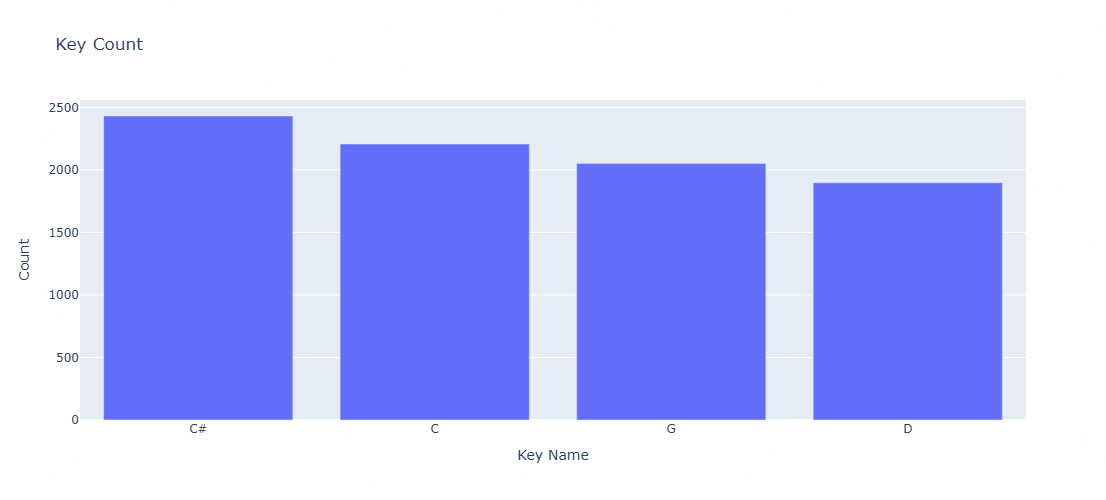

In [118]:
# Keys in 2010-now 

df_keys_post_2010 = pd.read_sql("""SELECT TOP 4 key_name,
COUNT(key_name) [Count of keys post 2010]
FROM spotify_tracks_cleaned
WHERE release_year >2010
GROUP BY key_name
ORDER BY COUNT(key_name) DESC 
""", engine)

#df_keys_post_2010.plot(kind = 'bar', x='key_name', y= 'Count of keys post 2010', legend = False)

px.bar(x='key_name', y= 'Count of keys post 2010', data_frame = df_keys_post_2010, width=700, height=500,title = 'Key Count', labels = {'key_name': 'Key Name', 'Count of keys post 2010':'Count'})

Here in recent times post 2010 we can clearly see that C# major came out to be most frequntly used key, it has overtaken guitar friendly keys, artists which used these keys in their tracks are Calvin Harris, Dua Lipa. This shows digitally produced and electronic tracks along side C, G, D major which are guitar centric keys which were also dominant bacause of artists like Ed Sheeran, Adele, Bruno Mars, Coldplay, Imagine Dragons.
This era, we can say it as Spotify era- it was not just digital and guitar centric because audince wanted everything in this era

## Correlations 
This part of analysis will help to identify how mucal features corelate with each other and what makes a song hit or flop. This helps us to detect emerging trends and optimize playlist curation

In [124]:
features = ['energy','loudness','danceability','tempo_bpm','acousticness','popularity']

correlation_matrix = df_song[features].corr()

correlation_matrix

,energy,loudness,danceability,tempo_bpm,acousticness,popularity
energy,1.000000,0.744508,0.122491,0.201824,-0.717469,0.043851
loudness,0.744508,1.000000,0.267274,0.169669,-0.564985,0.231313
danceability,0.122491,0.267274,1.000000,-0.103212,-0.198719,0.128589
tempo_bpm,0.201824,0.169669,-0.103212,1.000000,-0.152447,-0.006031
acousticness,-0.717469,-0.564985,-0.198719,-0.152447,1.000000,-0.047493
popularity,0.043851,0.231313,0.128589,-0.006031,-0.047493,1.000000


In [125]:
# Decade wise correlation

df_song['decade'] = (df_song['release_year']//10)*10

decade_corr = df_song.groupby('decade')[features].corr().unstack()

decade_corr

energy                                                           \
       energy  loudness danceability tempo_bpm acousticness popularity   
decade                                                                   
1980      1.0  0.782641     0.054789  0.239922    -0.719387   0.023986   
1990      1.0  0.762121     0.151283  0.162264    -0.721120   0.078635   
2000      1.0  0.790328     0.123045  0.198473    -0.748494   0.059800   
2010      1.0  0.705239     0.141389  0.219960    -0.691031  -0.090825   
2020      1.0  0.684696     0.090996  0.111790    -0.499978  -0.104125   

        loudness                                  ... acousticness            \
          energy loudness danceability tempo_bpm  ... danceability tempo_bpm   
decade                                            ...                          
1980    0.782641      1.0     0.142853  0.173007  ...    -0.167812 -0.191004   
1990    0.762121      1.0     0.253822  0.135172  ...    -0.216271 -0.102371   
2000    0.790328      1.0     0.253474  0.175343  ...    -0.178647 -0.146926   
2010    0.705239      1.0     0.340991  0.227139  ...    -0.201177 -0.175119   
2020    0.684696      1.0     0.213986  0.127707  ...    -0.270032 -0.142949   

                               popularity                                   \
       acousticness popularity     energy  loudness danceability tempo_bpm   
decade                                                                       
1980            1.0  -0.027590   0.023986  0.081650     0.093676  0.001341   
1990            1.0  -0.072655   0.078635  0.136264     0.060941 -0.011835   
2000            1.0  -0.060152   0.059800  0.094119     0.062745  0.012409   
2010            1.0   0.056969  -0.090825  0.056968     0.076268 -0.038708   
2020            1.0  -0.002615  -0.104125 -0.039037    -0.037274 -0.044214   

                                
       acousticness popularity  
decade                          
1980      -0.027590        1.0  
1990      -0.072655        1.0  
2000      -0.060152        1.0  
2010       0.056969        1.0  
2020      -0.002615        1.0  

[5 rows x 36 columns]

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

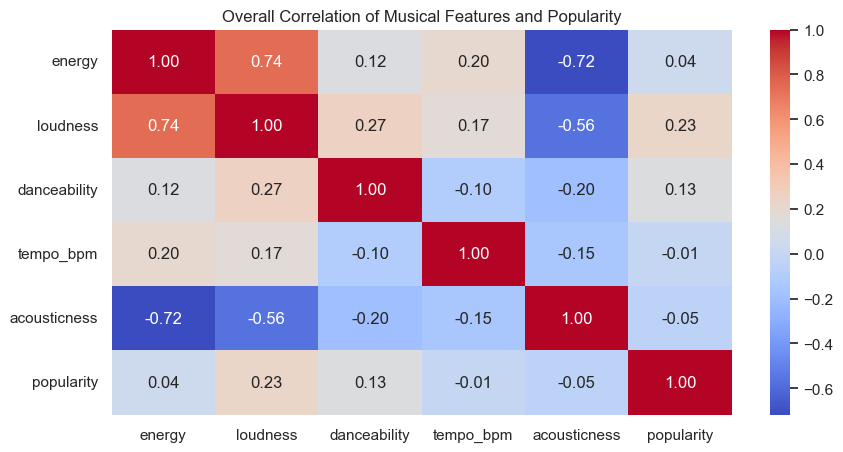

In [127]:
plt.figure(figsize = (10,5))

sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Overall Correlation of Musical Features and Popularity")
plt.show()
          

Here we can confidently say that popularity of songs are not determined by Musical Features- hit songs are mix of marketing, artist fan following, trends and placement of playlists on streaming platforms.
Spotify recomendation engine should focus on user behaviour, trends and artists prefrence, and by analysing all musical features we can conclude:

1.) Loud Songs are mostly energetic and can be dancable

2.) Acoustic songs have low energy and loudnness - acoustic tracks are genrally are softer and have low energy. 

3.) Tempo of a track doesn't largely depend upon any of the musical featuers

## Actionable Insights for Spotify:

1.) Personalise recomendation based on user behaviour, prefrence, trends, hype rather than musical features

2.) Spotify can curate energetic and loud tracks for party and gym playlists and in contrast acoustic and chill     playlists.

## Popularity Insights

#### Average popularity by decade

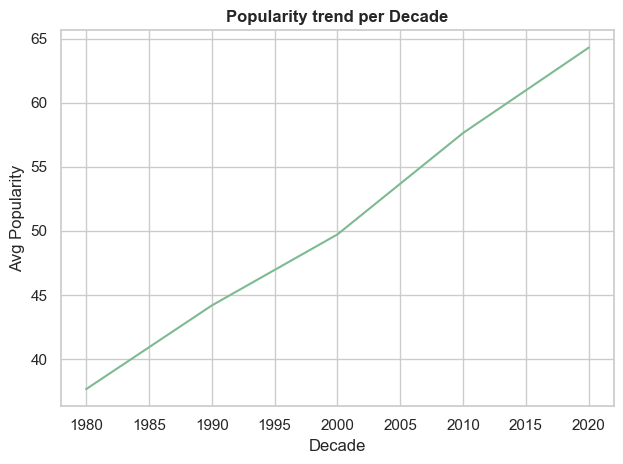

In [145]:
df_popularity_trend_by_decade = df_song[['popularity', 'decade']].groupby('decade').mean()

#df_popularity_trend_by_decade.plot(kind = 'line', xlabel = 'Year', ylabel = 'Avg Popularity', legend = False)

sns.lineplot(data = df_popularity_trend_by_decade, x = 'decade', y = 'popularity')
plt.xlabel('Decade')
plt.ylabel('Avg Popularity')
plt.title('Popularity trend per Decade', weight = 'bold')
plt.tight_layout()
plt.show()

Here we can confidently say that users are engaging and listening more to newer tracks post 2010, rather than old tracks because of change in production quality, marketing, digital streaming platforms.

So Spotify should recommend more of newer songs to listeners and older hits can be curated in nostalgia playlists

#### Top musical features among popular songs

In [184]:
# Here we dont want popularity in features list we defined earlier
features.pop(-1)

'popularity'

In [186]:
features

['energy', 'loudness', 'danceability', 'tempo_bpm', 'acousticness']

In [140]:
df_metrics_of_popular_tracks = pd.read_sql("""SELECT 
AVG(energy)  [Avg Energy],
AVG(acousticness)  [Avg acousticness],
AVG(duration_min) [Avg duration]
FROM spotify_tracks_cleaned
WHERE popularity>80""" , engine)

df_metrics_of_all_tracks = pd.read_sql("""SELECT
AVG(energy)  [Avg Energy],
AVG(acousticness)  [Avg acousticness],
AVG(duration_min) [Avg duration]
FROM spotify_tracks_cleaned""" , engine)

print(df_metrics_of_popular_tracks)
print(df_metrics_of_all_tracks )

   Avg Energy  Avg acousticness  Avg duration
0    0.613438          0.249269      3.386549
   Avg Energy  Avg acousticness  Avg duration
0    0.616059          0.283414      4.005869


Right Now we are not making grouped bar chart for comparison as i need to learn matplotlib 


Here we can clearly see that we have a noticable diffrence in duration so song rougly ~40 seconds means shorter songs are genrally more paoular and in previous analysis we can see post 2010 songs are most popular and average duration of songs post 2010 have average duration of roughly 3 to 3.5 minutes and as post 2010 tracks are domination in popularity so we have got this analysis.


Energy is no longer a differentiator — most songs today maintain moderate energy levels.

Acousticness being slightly lower shows a steady shift toward digital production but not drastically.

This supports the modern streaming trend where listeners prefer concise, high-engagement tracks that deliver impact quickly.

### Explicit Songs

#### % of songs explicit among all and popular songs and 
#### % of Explicit tracks among popular tracks

In [139]:
df_perc_of_explicit_tracks  = pd.read_sql("""SELECT
CONCAT(ROUND((SUM(CAST(explicit_flag AS FLOAT)) / COUNT(*))*100, 2), ' %') [% of expllicit_tracks among ALL tracks]
FROM spotify_tracks_cleaned""", engine)

df_perc_of_explicit_tracks_among_popular_tracks = pd.read_sql("""SELECT
CONCAT(ROUND((SUM(CAST(explicit_flag AS FLOAT)) / COUNT(*))*100, 2), ' %') [% of expllicit_tracks among POPULAR tracks]
FROM spotify_tracks_cleaned
WHERE popularity>80""", engine)

print(df_perc_of_explicit_tracks)
print(df_perc_of_explicit_tracks_among_popular_tracks)

  % of expllicit_tracks among ALL tracks
0                                14.91 %
  % of expllicit_tracks among POPULAR tracks
0                                    36.57 %


Explicit content accounts for nearly 40% of popular tracks, which is significantly higher than the ~15% representation across all songs. This indicates that explicit lyrics are a common feature of modern hits and cannot be ignored.

For Spotify, this insight can guide playlist curation and recommendation systems: listeners who enjoy modern tracks—especially genres like hip-hop, rap, and trap dominated by artists such as Travis Scott and Kendrick Lamar—are more likely to engage with songs containing explicit lyrics. By recommending explicit-content tracks to users with this preference, Spotify can improve personalization and user satisfaction, and also  this trend aligns with Gen Z listening habits, short-form content, and streaming behaviors.

What makes a song popular? - 

It is the combination of Short duration, moderate energy and explicit lyrics.

Explicit lyrics and modern short duration (high engagement) tracks tend to be more popular while energy is not a major diffrenciator.

In [144]:
df_top_artists = pd.read_sql("""SELECT TOP 11
artist_name,
COUNT(track_name) [Total Tracks],
AVG(popularity) [Popularity],
AVG(energy) [Energy],
AVG(acousticness) [Acousticness]
FROM spotify_tracks_cleaned
GROUP BY artist_name
HAVING COUNT(track_name)> 100 AND AVG(popularity) > 45
ORDER BY COUNT(track_name) DESC ,  AVG(popularity) DESC""",  engine)

df_top_artists

,artist_name,Total Tracks,Popularity,Energy,Acousticness
0,Taylor Swift,207,58,0.619362,0.224745
1,Red Hot Chili Peppers,196,48,0.824561,0.048498
2,Eminem,167,55,0.729819,0.127763
3,Green Day,136,48,0.898007,0.018309
4,Bts,132,68,0.774712,0.112548
5,Michael Jackson,126,53,0.723929,0.236368
6,Drake,122,61,0.552500,0.229117
7,The Smiths,121,46,0.772521,0.104553
8,Luis Miguel,114,52,0.621219,0.361572
9,Joan Sebastian,111,48,0.514225,0.572721


While analysing the top artists provides context on who defined music trends in different eras, energy and acousticness levels vary widely across artists and decades. Older tracks tended to have moderate energy and acousticness, whereas post-2010 music is increasingly electronically produced with lower acousticness. This reinforces that trend-level analysis over decades is more meaningful than trying to generalize at the artist level.

So these were the artists who defined trends.

# Summary

#### Song duration: 
Since the 1980s, average track duration dropped from about 4.3 minutes to just over 3 minutes today, reflecting shorter attention spans and the rise of streaming and short-form content.

#### Energy and loudness:
They peaked around 2010, while danceability has gradually increased, showing that modern music favors more engaging, rhythm-driven tracks.

#### Electronic production domination: 
Acousticness has declined over the decades, highlighting the shift from organic, instrument-driven songs to digitally produced sounds in contemporary music.

#### Explicit content is also a major factor in hits: 
While only ~15% of all songs are explicit, nearly 37% of popular tracks contain explicit lyrics, reflecting the influence of hip-hop, trap, and streaming-era listening trends.

#### Keys reveal compositional trends: 
Earlier decades favored keys like C, G, and A, whereas C# and other electronic-friendly tones have gained prominence post-2010, signaling changing musical tastes and production styles.

#### Popularity is multi-dimensional: 
High energy, loudness, and danceability helps, but hits mostly depends upon catchy hooks, explicit content, marketing, artist's popularity and evolving genre trends — showing that musical success isn’t determined by audio features alone.